In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
customer=pd.read_csv("customer.csv")
sales=pd.read_csv("sales.csv")
products=pd.read_csv("products.csv")
df2=sales.merge(products, on='product_id', how='left')
df=df2.merge(customer, on='customer_id', how='left')

In [2]:
df.head()

,serial_number,order_id,order_date,delivery_date,time_of_order,time_of_delivery,delivery_mode,sales_agent,payment_mode,delivery_rating,...,customer_age,Customer_type,country,city,state,SMS_Marketing,Email_Marketing,Membership_type,Joining_date,App_Downloaded
0,4720,D-94655-11910,03-01-2019,07-01-2019,10:50 AM,5:12 PM,Standard Class,Robert Paige,Debit Card,2,...,66,City Club,United States,Arlington,Virginia,NO,YES,Silver,20-02-2020,NO
1,428,D-75151-11913,04-01-2019,08-01-2019,1:27 PM,3:52 PM,Standard Class,Chris Jr,Debit Card,1,...,53,State Club,United States,Huntsville,Texas,NO,NO,Silver,04-11-2019,NO
2,429,C-55852-11913,04-01-2019,08-01-2019,1:12 PM,5:23 PM,Standard Class,Tom Renner,Credit card,1,...,70,City Club,United States,Newark,Ohio,NO,YES,Gold,17-06-2019,YES
3,1041,D-13194-11912,05-01-2019,12-01-2019,12:17 PM,10:11 AM,Standard Class,Robert Hemsworth,Debit Card,2,...,53,State Club,United States,Huntsville,Texas,NO,NO,Silver,04-11-2019,NO
4,4229,C-26707-11916,06-01-2019,07-01-2019,4:36 PM,1:41 PM,First Class,John Wick,Cash,2,...,48,State Club,United States,Saint Paul,Minnesota,YES,NO,Basic,01-02-2020,YES



Task 1: State-wise Sales Analysis: Bar Chart Visualization
Your task is to find out the total sales of each state by creating a horizontal bar chart of state vs. sales to gain insights into the sales performance across different states. 
The bars should be sorted in a way so that the state with maximum sales value is on the top and the state with lowest sales value is at the bottom.


In [3]:
bar_data = df.loc[:,['state','sales']]
bar_data = bar_data.groupby('state').sum().reset_index()
bar_data = bar_data.sort_values(by=['sales'])
bar_data.head()

,state,sales
7,District of Columbia,145.272
23,Nevada,247.336
13,Kansas,369.928
34,South Dakota,756.410
16,Maryland,1110.320


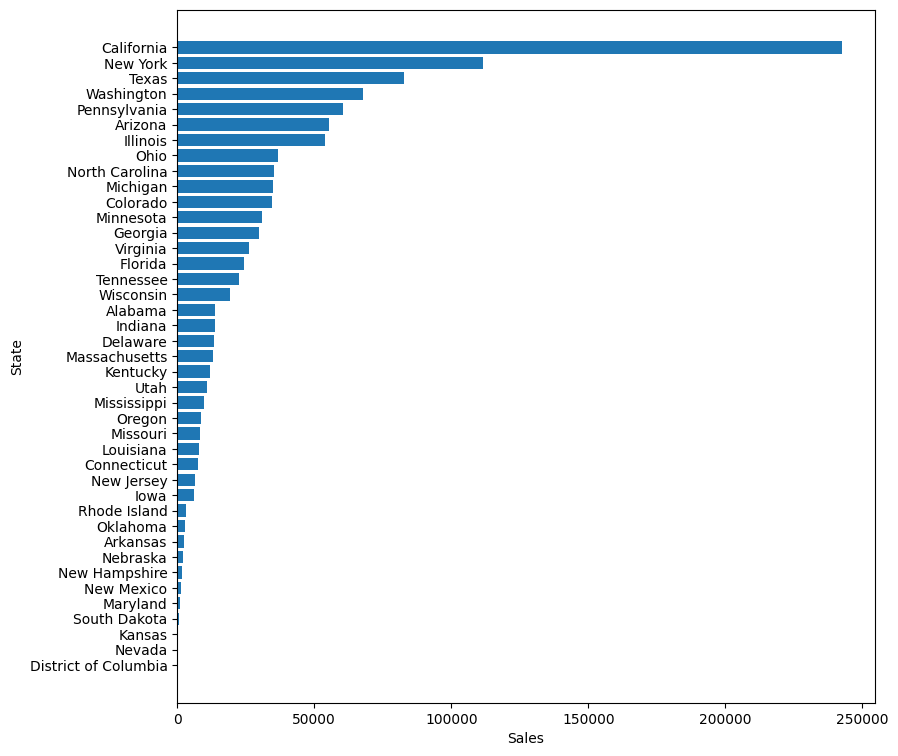

In [4]:
plt.figure(figsize=(9,9))
plt.barh(bar_data['state'],bar_data['sales'])
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

Task 2: Product Category Sales Analysis: Pie Chart Visualization
Your task is to find out the total sales of each category and draw a pie chart of product category vs. sales amount to understand the distribution of sales across different product categories.

In [5]:
df.columns

Index(['serial_number', 'order_id', 'order_date', 'delivery_date',
       'time_of_order', 'time_of_delivery', 'delivery_mode', 'sales_agent',
       'payment_mode', 'delivery_rating', 'product_id', 'customer_id', 'sales',
       'quantity', 'percent_discount', 'profit', 'Product_name', 'category',
       'sub_category', 'color', 'brand_name', 'average_rating',
       'reviews_count', 'customer_name', 'customer_age', 'Customer_type',
       'country', 'city', 'state', 'SMS_Marketing', 'Email_Marketing',
       'Membership_type', 'Joining_date', 'App_Downloaded'],
      dtype='object')

In [6]:
pie_data = df.loc[:,['category','sales']]
pie_data = pie_data.groupby('category').sum().reset_index()
pie_data.head()

,category,sales
0,Accessories,160126.2459
1,Clothing,426379.4489
2,Shoes,530436.9265


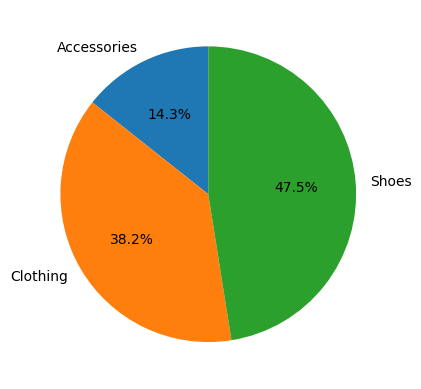

In [7]:
plt.pie(pie_data['sales'],labels = pie_data['category'],startangle=90, autopct = '%1.1f%%')
plt.show()

In [8]:
 dn_df = df.loc[:, ['payment_mode', 'quantity']]

In [9]:
dn_df = dn_df.groupby('payment_mode').sum().reset_index()

In [10]:
print(dn_df)

    payment_mode  quantity
0  Bank Transfer      5699
1           Cash      5649
2    Credit card      5570
3     Debit Card      5666


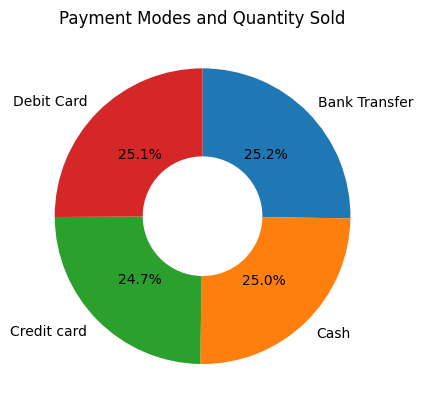

In [11]:
fig, ax = plt.subplots()
labels = dn_df['payment_mode']
sizes = dn_df['quantity']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'width': 0.7})
circle = plt.Circle((0, 0), 0.4, color='white') 
ax.add_artist(circle)
plt.title('Payment Modes and Quantity Sold')
plt.show()

Top Customers Analysis: Identifying Customers with Highest Number of Items Purchased
Your task is to identify the customers who have bought the most number of items from our sales data. 
This analysis will help us identify our top customers and understand their purchasing behavior.

In [12]:
df.columns

Index(['serial_number', 'order_id', 'order_date', 'delivery_date',
       'time_of_order', 'time_of_delivery', 'delivery_mode', 'sales_agent',
       'payment_mode', 'delivery_rating', 'product_id', 'customer_id', 'sales',
       'quantity', 'percent_discount', 'profit', 'Product_name', 'category',
       'sub_category', 'color', 'brand_name', 'average_rating',
       'reviews_count', 'customer_name', 'customer_age', 'Customer_type',
       'country', 'city', 'state', 'SMS_Marketing', 'Email_Marketing',
       'Membership_type', 'Joining_date', 'App_Downloaded'],
      dtype='object')

In [13]:
customer_df = df.loc[:, ['customer_id', 'customer_name', 'quantity']]

In [14]:
customer_df = customer_df.groupby(['customer_id','customer_name']).sum().reset_index()

In [15]:
top_loyal_customer = customer_df.sort_values('quantity', ascending= False).head(10)
print(top_loyal_customer)

    customer_id        customer_name  quantity
784    WPP-4399        William Brown        93
258    EIC-1982           Emily Phan        91
555    NIC-1732         Noel Staavos        84
268    ENW-6578         Edward Hooks        82
507    MMD-7588  Maribeth Schnelling        82
349    JCM-4112             John Lee        79
590    PGS-5039           Paul Prost        79
676    SDW-9345    Steven Cartwright        77
611    PWM-6328            Pete Kriz        77
172    CPP-8584  Chloris Kastensmidt        77


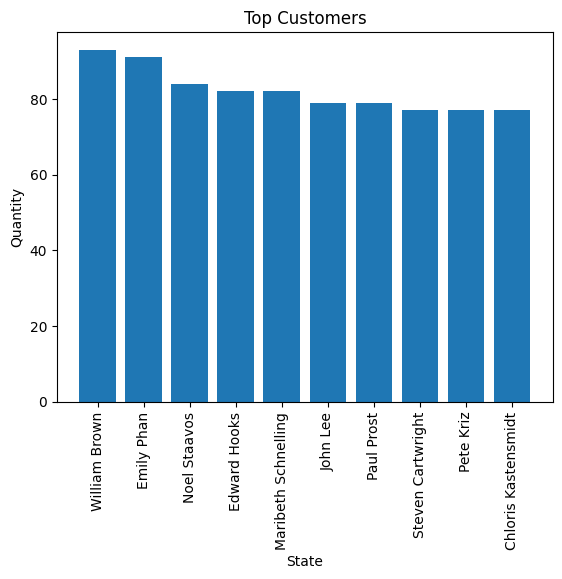

In [16]:
plt.bar(top_loyal_customer['customer_name'], top_loyal_customer['quantity'])
plt.xticks(rotation=90)
plt.title('Top Customers')
plt.xlabel('State')
plt.ylabel('Quantity')
plt.show()

Optimizing Stock for New Store Opening in New York Based on Subcategory Profitability
Your task is to provide a list of four subcategories from each category, ranked based on the total quantity sold in New York.

In [17]:
df.columns

Index(['serial_number', 'order_id', 'order_date', 'delivery_date',
       'time_of_order', 'time_of_delivery', 'delivery_mode', 'sales_agent',
       'payment_mode', 'delivery_rating', 'product_id', 'customer_id', 'sales',
       'quantity', 'percent_discount', 'profit', 'Product_name', 'category',
       'sub_category', 'color', 'brand_name', 'average_rating',
       'reviews_count', 'customer_name', 'customer_age', 'Customer_type',
       'country', 'city', 'state', 'SMS_Marketing', 'Email_Marketing',
       'Membership_type', 'Joining_date', 'App_Downloaded'],
      dtype='object')

In [18]:
new_state = 'New York'
newstore_df = df[df['state']== new_state]

In [19]:
newstore_df = newstore_df.groupby(['category','sub_category'])['quantity'].sum().reset_index()
newstore_df = newstore_df.sort_values(['category','quantity'], ascending= False).groupby('category').head(4)

In [20]:
print(newstore_df)

       category           sub_category  quantity
18        Shoes            Women/Shoes       531
13        Shoes              Men/Shoes       430
12        Shoes             Kids/Shoes       156
14        Shoes        Originals/Shoes        73
10     Clothing         Women/Clothing       440
8      Clothing           Men/Clothing       345
7      Clothing          Kids/Clothing        57
6      Clothing    Essentials/Clothing         7
2   Accessories  Originals/Accessories       208
4   Accessories   Training/Accessories        51
5   Accessories      Women/Accessories        43
1   Accessories        Men/Accessories        27


Visualizing Subcategory Profitability Using a Stacked Column Chart
Your task is to create a stacked column chart to visualize the total quantity sold for each subcategory. 
This chart will help us understand the distribution of sales across different subcategories and identify the subcategories with the highest sales volumes.

In [21]:
pivot_df = newstore_df.pivot(index='sub_category', columns='category', values='quantity')

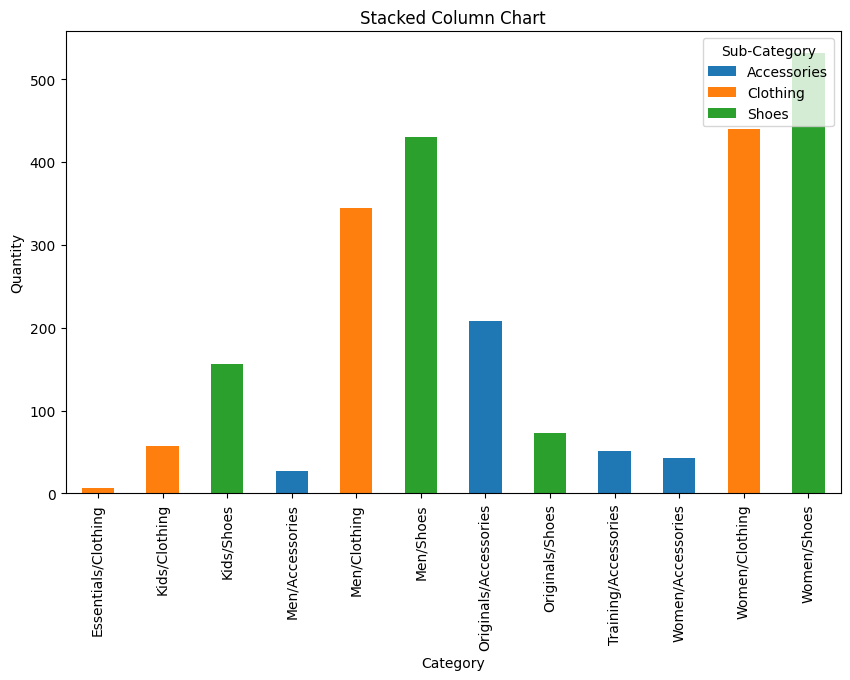

In [22]:
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Stacked Column Chart')

# Display the legend
plt.legend(title='Sub-Category', loc='upper right')

# Show the plot
plt.show()

Identification of Top Performing Brands for Most Profitable Category
Your task is to determine the top 2 brands with the highest total sales value for the
products belonging to the most profitable category during the specified time period of January 1, 2019, to June 30, 2019. 
It's essential that the delivery mode used is "Standard delivery".

In [23]:
sales_filtered = df.loc[(df['delivery_mode'] == 'Standard Class') & (df['order_date'] >= '01-01-2019') & (df['order_date'] <= '30-06-2019')]
sales_filtered.head()

,serial_number,order_id,order_date,delivery_date,time_of_order,time_of_delivery,delivery_mode,sales_agent,payment_mode,delivery_rating,...,customer_age,Customer_type,country,city,state,SMS_Marketing,Email_Marketing,Membership_type,Joining_date,App_Downloaded
0,4720,D-94655-11910,03-01-2019,07-01-2019,10:50 AM,5:12 PM,Standard Class,Robert Paige,Debit Card,2,...,66,City Club,United States,Arlington,Virginia,NO,YES,Silver,20-02-2020,NO
1,428,D-75151-11913,04-01-2019,08-01-2019,1:27 PM,3:52 PM,Standard Class,Chris Jr,Debit Card,1,...,53,State Club,United States,Huntsville,Texas,NO,NO,Silver,04-11-2019,NO
2,429,C-55852-11913,04-01-2019,08-01-2019,1:12 PM,5:23 PM,Standard Class,Tom Renner,Credit card,1,...,70,City Club,United States,Newark,Ohio,NO,YES,Gold,17-06-2019,YES
3,1041,D-13194-11912,05-01-2019,12-01-2019,12:17 PM,10:11 AM,Standard Class,Robert Hemsworth,Debit Card,2,...,53,State Club,United States,Huntsville,Texas,NO,NO,Silver,04-11-2019,NO
5,4412,C-13254-11912,06-01-2019,10-01-2019,12:14 PM,4:03 PM,Standard Class,John Wick,Credit card,4,...,70,City Club,United States,Newark,Ohio,NO,YES,Gold,17-06-2019,YES


In [24]:
most_profitable_category = sales_filtered.groupby(['category'])['profit'].sum().idxmax()
print(most_profitable_category)

Clothing


In [25]:
sales_by_brand = sales_filtered.loc[sales_filtered['category'] == most_profitable_category].groupby(['brand_name'])['sales'].sum().reset_index()
print(sales_by_brand)

  brand_name        sales
0       Nike   93619.7720
1     adidas  159016.4715


In [26]:
top_brands = sales_by_brand.sort_values('sales', ascending=False).head(2)
top_brands.head()

,brand_name,sales
1,adidas,159016.4715
0,Nike,93619.7720


Monthly Sales Trend Analysis: Line Chart Visualization
Your task is to create a line chart showing the trend of sales by each month.

In [27]:
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%d-%m-%Y')
monthly_sales = sales.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()

plt.plot(monthly_sales['order_date'], monthly_sales['sales'])
plt.xlabel('Month') 
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()

Sales Time Series Analysis: Order Date and Sales Value
Your task is to create a time series dataset consisting of order dates and corresponding sales values.

In [28]:
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%d-%m-%Y')
f_df = sales.loc[:, ['order_date', 'sales']]

In [29]:
forecast_df = f_df.groupby(['order_date'])['sales'].sum().reset_index()

In [30]:
forecast_df = forecast_df.sort_values(by = 'order_date')
forecast_df.head()

,order_date,sales
0,2019-01-03,2.214
1,2019-01-04,194.736
2,2019-01-05,21.184
3,2019-01-06,254.440
4,2019-01-07,43.260


Short-Term Sales Forecasting: ARIMA Model
Your task is to utilize the ARIMA model for predicting sales values based on this time series dataset.

In [31]:
forecast_df.set_index('order_date', inplace=True)

In [32]:
train_size = int(forecast_df.shape[0] - 30)
train = forecast_df[0:train_size]
test = forecast_df[train_size:]

In [33]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [34]:
model = ARIMA(train["sales"], order=(2, 2, 5))

/home/labsuser/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/labsuser/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/labsuser/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
model_fit = model.fit()

/home/labsuser/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/labsuser/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
forecast_values = model_fit.get_forecast(steps=30)

/home/labsuser/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [37]:
forecasted_sales = forecast_values.predicted_mean

In [38]:
forecasted_index = pd.date_range(start=train.index[-1] + pd.DateOffset(days=1), periods=len(forecasted_sales))

In [40]:
actual_values = test['sales']

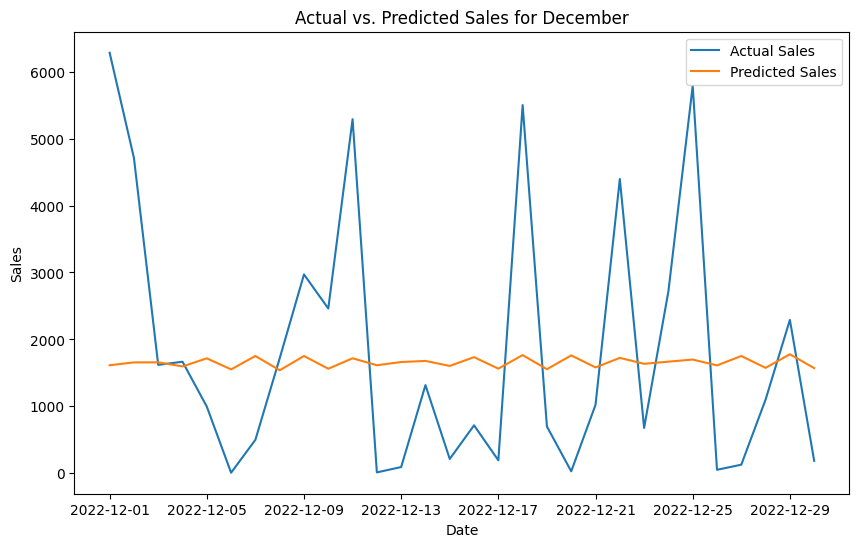

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values.index, actual_values, label='Actual Sales')
plt.plot(forecasted_index, forecasted_sales, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales for December')
plt.legend()
plt.show()